# Question 4 
<b>Draco Strikes Again!</b>

### <b>Part 1 and 2</b>

In [1]:
# Load necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def bitQuantizeImage(im,k):
    eightBit = 2**8
    kBitMax = 2**k - 1 
    output = np.around(im*(kBitMax/eightBit), decimals=0)
    return output.astype('uint8')

In [3]:
def drawHistogram(img):
    his = np.zeros(256,)
    a = img.flatten()
    for i in a:
        his[i] = his[i]+1
    return his

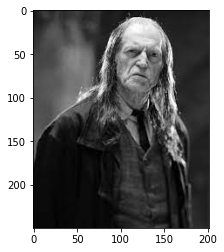

In [4]:
filchOrigi = cv2.imread("../images/filch.jpg")
plt.imshow(filchOrigi,cmap='gray')
filch = cv2.cvtColor(filchOrigi,cv2.COLOR_BGR2GRAY)

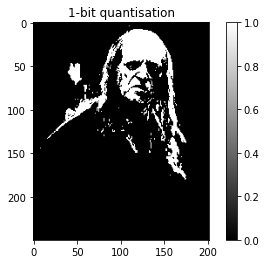

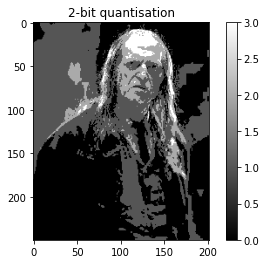

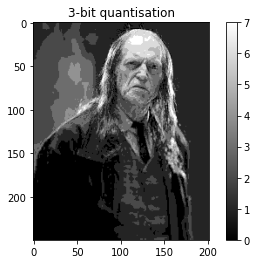

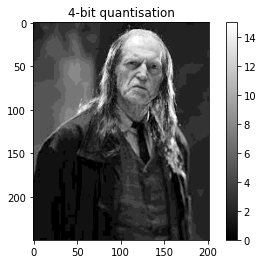

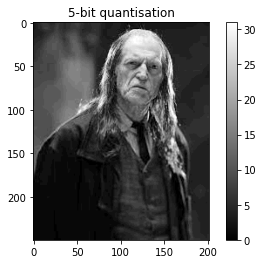

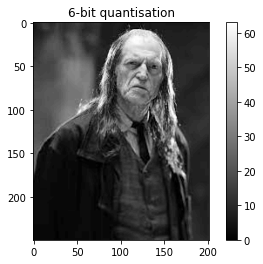

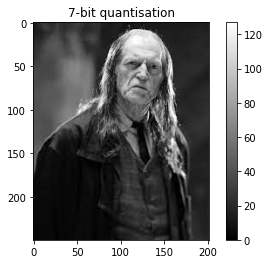

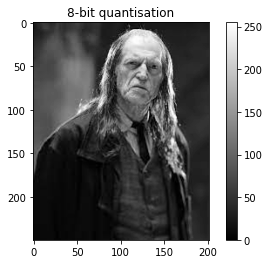

In [5]:
for x in range(1, 9):
    out = bitQuantizeImage(filch,x)
    maxBit = 2**x - 1
#     plt.subplot(2, 4, x)
    plt.imshow(out, cmap='gray', vmin=0, vmax=maxBit)
    plt.title(str(x)+"-bit quantisation")
    plt.colorbar()
    plt.show()

### <b>Part 3</b>

In [6]:
hermoineOrigi = cv2.imread("../images/hermoine.jpg")
hermoine = cv2.cvtColor(hermoineOrigi,cv2.COLOR_BGR2GRAY)

In [7]:
def bitPlaneSlice(img,k): 
    ans = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ans[i][j] = img[i][j] & (1<<(k-1))
    return ans.astype('uint8')

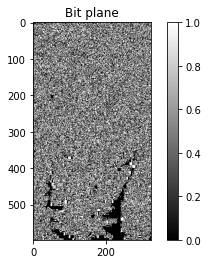

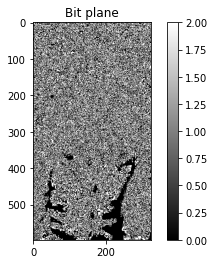

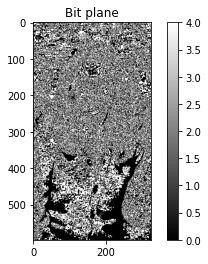

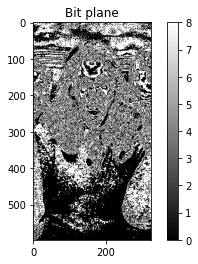

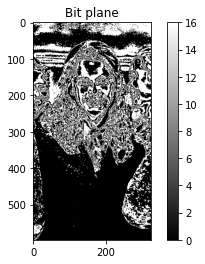

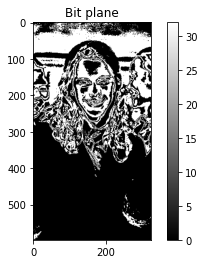

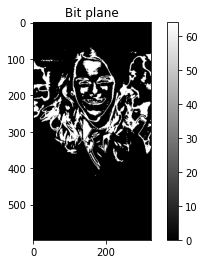

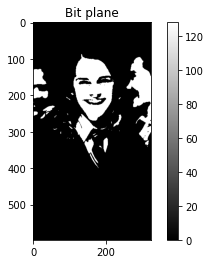

In [8]:
for x in range(1,9):
    maxBit = 2**(x-1)
    out = bitPlaneSlice(hermoine,x)
    plt.imshow(out,cmap = 'gray', vmin = 0, vmax = maxBit) 
    plt.title("Bit plane")
    plt.colorbar()
    plt.show()

### <b>Part 4</b>

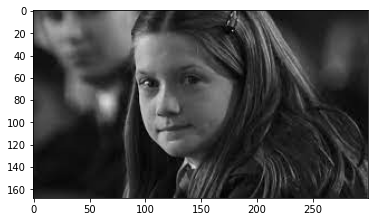

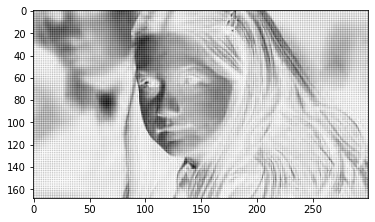

(168, 300, 3)


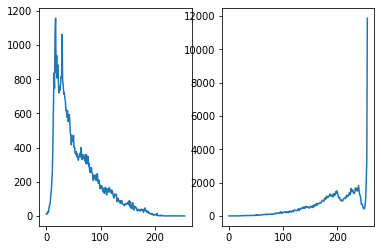

In [9]:
ginny = cv2.imread("../images/ginny.jpg")
ginnyC = cv2.imread("../images/ginny_corrupt.jpg")
plt.imshow(ginny)
plt.show()
plt.imshow(ginnyC)
plt.show()
print(ginny.shape)
ginny = cv2.cvtColor(ginny,cv2.COLOR_BGR2GRAY)
plt,axs = plt.subplots(1,2)
histg = drawHistogram(ginny)
axs[0].plot(histg)
histg = drawHistogram(ginnyC)
axs[1].plot(histg)

In [10]:
print(ginny.shape)

(168, 300)


In [11]:
def bitQuantizeImage(im,k):
    return (np.around(im*((2**k-1)/(2**8-1)))/((2**k-1)/(2**8-1))).astype(np.uint8)

In [12]:
# out1 = bitQuantizeImage(ginny,1)
# out2 = bitQuantizeImage(ginny,2)
# out3 = bitQuantizeImage(ginny,3)
# out4 = bitQuantizeImage(ginny,4)
# out5 = bitQuantizeImage(ginny,5)
# out6 = bitQuantizeImage(ginny,6)
# out7 = bitQuantizeImage(ginny,7)
# plt.imshow(255-out1,cmap='gray')
# plt.show()
# plt.imshow(255-out2,cmap='gray')
# plt.show()
# plt.imshow(255-out3,cmap='gray')
# plt.show()
# plt.imshow(255-out4,cmap='gray')
# plt.show()
# plt.imshow(255-out5,cmap='gray')
# plt.show()
# plt.imshow(255-out6,cmap='gray')
# plt.show()
# plt.imshow(255-out7,cmap='gray')
# plt.show()
# plt.imshow(255-ginny,cmap='gray')
# plt.show()

### Explanation
We notice that the histogram clearly shows that we first need to get the <b>negative</b> of the image. So we do 255-ginny. 
But we also notice a netted(mesh) sort of a superimposition on the negative image in a regular pattern. On further obseration, it is seen that this can be obtained by adding a lighter pixel value at region when both pixel coorinates are even.
So we apply that concept here and we also notice that the mesh superimposed can be obtained by <i>subtracting the planes</i>. 


This solution has been arrived at after evaluation of the bitplanes as well as bit quantised images.

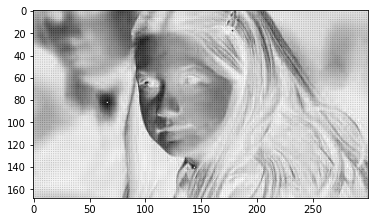

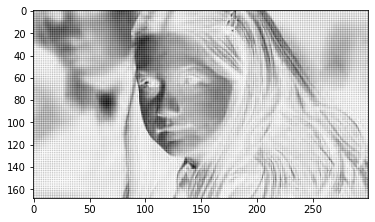

In [13]:
out = np.copy(ginny)
for i in range(len(ginny)):
    for j in range(len(ginny[i])):
        if i%2==0 and j%2==0:
            out[i][j] = 255 - ginny[i][j] +216
        else:
            out[i][j] = 255 - ginny[i][j]
# out = out-255+ginny
import matplotlib.pyplot as plt
plt.imshow(out,cmap='gray')
plt.show()
plt.imshow(ginnyC,cmap='gray')
plt.show()

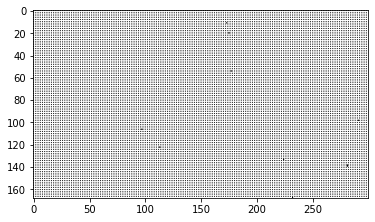

In [14]:
x = np.copy(255-out)
plt.imshow(x,cmap='gray')
for i in range(len(ginny)):
    for j in range(len(ginny[i])):
        if x[i][j]!=0:
            x[i][j]+= 255-ginny[i][j]

plt.imshow(x,cmap='gray')
plt.show()

### Verification:
When we take the negative of the corrupt and obtained corruption method image, we get the same image.

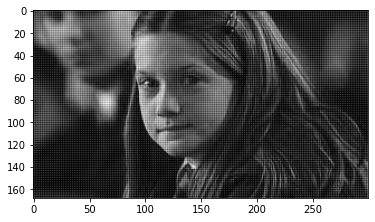

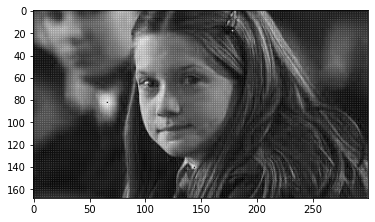

In [15]:
a = 255 - ginnyC
plt.imshow(a,cmap='gray')
plt.show()
plt.imshow(255-out,cmap='gray')
plt.show()
# histg = drawHistogram(255-ginnyC)
# plt.plot(histg)
# plt.show()
# histg = drawHistogram(ginny)
# plt.plot(histg)
# plt.show()


In [16]:
# histg = drawHistogram(ginnyC)
# plt.plot(histg)
# plt.show()
# histg = drawHistogram(out)
# plt.plot(histg)
# plt.show()